In [46]:
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key,g_key
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
lat=np.random.uniform(-90.00,90.00,10000)

In [3]:
lon=np.random.uniform(-180,180.00,10000)

In [4]:
coordinates=list(zip(lat,lon))

In [5]:
cities=set()

In [6]:

for nos in coordinates:
    citi=citipy.nearest_city(nos[0],nos[1])
    city=citi.city_name
    cities.add(city)
    if len(cities)==600:
        break

In [7]:
len(cities)

600

In [8]:
cities=list(cities)

In [9]:
type(cities)

list

In [10]:
cities=pd.DataFrame({'Cities':cities})
cities.head()

,Cities
0,nador
1,coquimbo
2,nemuro
3,fort wellington
4,bima


In [11]:
cities['Latitude']=0
cities['Longitude']=0
cities['Cloudiness']=0
cities['Date']=""
cities['Humidity']=0
cities['Max_Temp']=0
cities['Wind Speed']=0

In [12]:
cities.head()

,Cities,Latitude,Longitude,Cloudiness,Date,Humidity,Max_Temp,Wind Speed
0,nador,0,0,0,,0,0,0
1,coquimbo,0,0,0,,0,0,0
2,nemuro,0,0,0,,0,0,0
3,fort wellington,0,0,0,,0,0,0
4,bima,0,0,0,,0,0,0


In [13]:
url='http://api.openweathermap.org/data/2.5/weather?'

In [78]:
response

{'coord': {'lon': 2.35, 'lat': 48.85},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 59.29,
  'feels_like': 57.81,
  'temp_min': 55.99,
  'temp_max': 62.01,
  'pressure': 1018,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 330},
 'clouds': {'all': 0},
 'dt': 1599874224,
 'sys': {'type': 1,
  'id': 6550,
  'country': 'FR',
  'sunrise': 1599888207,
  'sunset': 1599934223},
 'timezone': 7200,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [88]:
lat=response['coord']['lat']
lon=response['coord']['lon']
cloudiness=response['clouds']['all']
date=response['dt']
humidity=response['main']['humidity']
max_temp=response['main']['temp_max']
wind=response['wind']['speed']


In [14]:
for index,row in cities.iterrows():
    print("Searching for {}".format(row['Cities']))
    url='http://api.openweathermap.org/data/2.5/weather?'
    q=row['Cities']
    params={'q':q, 'appid': weather_api_key,'units':'Imperial'}
    response=requests.get(url,params=params).json()
    try:
        cities.loc[index,'Latitude'] = response['coord']['lat']
        cities.loc[index,'Longitude'] = response['coord']['lon']
        cities.loc[index,'Cloudiness'] = response['clouds']['all']
        cities.loc[index,'Date'] = response['dt']
        cities.loc[index,'Humidity'] = response['main']['humidity']  
        cities.loc[index,'Max_Temp'] = response['main']['temp_max']
        cities.loc[index,'Wind Speed'] = response['wind']['speed']
    except KeyError:
        print("*"*30)
        print("Sorry couldn't find {}".format(row['Cities']))
        print("*"*30)

Searching for nador
Searching for coquimbo
Searching for nemuro
Searching for fort wellington
Searching for bima
Searching for poronaysk
Searching for brainerd
Searching for buala
Searching for pascagoula
Searching for beloha
Searching for guanica
Searching for tual
Searching for puerto ayora
Searching for skjervoy
Searching for saskylakh
Searching for atuona
Searching for rudbar
Searching for namibe
Searching for nevelsk
Searching for palmer
Searching for villarrica
Searching for borger
Searching for barentsburg
******************************
Sorry couldn't find barentsburg
******************************
Searching for lata
Searching for paris
Searching for amga
Searching for flinders
Searching for taolanaro
******************************
Sorry couldn't find taolanaro
******************************
Searching for camacupa
Searching for acajutla
Searching for dunedin
Searching for karkaralinsk
******************************
Sorry couldn't find karkaralinsk
******************************


Searching for severo-kurilsk
Searching for san-pedro
Searching for hermanus
Searching for hilo
Searching for mulchen
Searching for katsuura
Searching for solnechnyy
Searching for te anau
Searching for abha
Searching for muros
Searching for meadow lake
Searching for mar del plata
Searching for volot
Searching for matara
Searching for catamarca
Searching for coleraine
Searching for clyde river
Searching for san quintin
Searching for agua verde
Searching for hami
Searching for lincoln
Searching for zaysan
Searching for yamada
Searching for deep river
Searching for tirlyanskiy
Searching for vaitupu
******************************
Sorry couldn't find vaitupu
******************************
Searching for povenets
Searching for ati
Searching for najran
Searching for surin
Searching for jiwani
Searching for necochea
Searching for inirida
Searching for ilulissat
Searching for balkhash
Searching for auki
Searching for olafsvik
Searching for bandarbeyla
Searching for bayir
Searching for airai
Searc

Searching for cockburn town
Searching for isiolo
Searching for suclayin
Searching for plettenberg bay
Searching for sungaipenuh
Searching for yerbogachen
Searching for ibipeba
Searching for sola
Searching for tuatapere
Searching for kaitangata
Searching for khatanga
Searching for leshukonskoye
Searching for machinga
Searching for zharkent
Searching for yarkovo
Searching for amantea
Searching for pochutla
Searching for cape town
Searching for torit
Searching for jardim
Searching for pundaguitan
Searching for bolonchen
******************************
Sorry couldn't find bolonchen
******************************
Searching for berlevag
Searching for beyneu
Searching for ginir
Searching for shetpe
Searching for paamiut
Searching for praia da vitoria
Searching for sao filipe
Searching for dingle
Searching for san carlos
Searching for kabanjahe
Searching for los llanos de aridane
Searching for broome
Searching for qabis
******************************
Sorry couldn't find qabis
******************

In [35]:
df_cities=(cities[cities['Latitude']!=0])

In [36]:
df_cities.head()

,Cities,Latitude,Longitude,Cloudiness,Date,Humidity,Max_Temp,Wind Speed
0,nador,35.17,-2.93,95,1599877056,83,73.40,4.70
1,coquimbo,-29.95,-71.34,0,1599877056,87,53.60,1.12
2,nemuro,43.32,145.57,75,1599877056,77,60.80,9.17
3,fort wellington,6.40,-57.60,8,1599877056,81,80.37,7.56
4,bima,-8.47,118.72,57,1599877057,49,89.91,4.56


In [37]:
df_cities['Humidity']=df_cities['Humidity'].div(100)
df_cities['Cloudiness']=df_cities['Cloudiness'].div(100)

C:\Users\Pankaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pankaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
df_cities.head()

,Cities,Latitude,Longitude,Cloudiness,Date,Humidity,Max_Temp,Wind Speed
0,nador,35.17,-2.93,0.95,1599877056,0.83,73.40,4.70
1,coquimbo,-29.95,-71.34,0.00,1599877056,0.87,53.60,1.12
2,nemuro,43.32,145.57,0.75,1599877056,0.77,60.80,9.17
3,fort wellington,6.40,-57.60,0.08,1599877056,0.81,80.37,7.56
4,bima,-8.47,118.72,0.57,1599877057,0.49,89.91,4.56


In [39]:
lat=df_cities['Latitude']
humidity=df_cities['Humidity']
cloudiness=df_cities['Cloudiness']
wind_speed=df_cities['Wind Speed']
temp=df_cities['Max_Temp']

(-0.3792471217803853, 2.5252415486115562e-20)

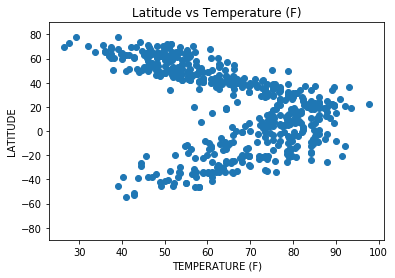

In [52]:
plt.scatter(temp,lat)
plt.xlabel('TEMPERATURE (F)')
plt.ylabel('LATITUDE')
plt.ylim(-90,90)
plt.title('Latitude vs Temperature (F)')
corr=sts.pearsonr(temp,lat);
corr

(0.09806057443764636, 0.021209455723531025)

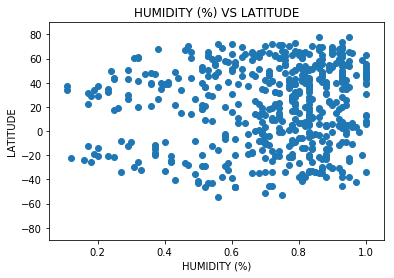

In [55]:
plt.scatter(humidity,lat)
plt.xlabel('HUMIDITY (%)')
plt.ylabel('LATITUDE')
plt.title('HUMIDITY (%) VS LATITUDE')
plt.ylim(-90,90)
corr=sts.pearsonr(humidity,lat);
corr

(0.028587580126897903, 0.5026853660752437)

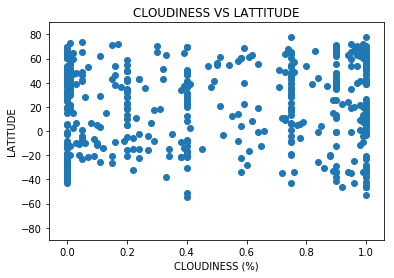

In [57]:
plt.scatter(cloudiness,lat)
plt.ylim(-90,90)
plt.xlabel('CLOUDINESS (%)')
plt.ylabel('LATITUDE')
plt.title('CLOUDINESS VS LATTITUDE')
corr=sts.pearsonr(cloudiness,lat);
corr

(-0.08265946697122228, 0.05226094695795055)

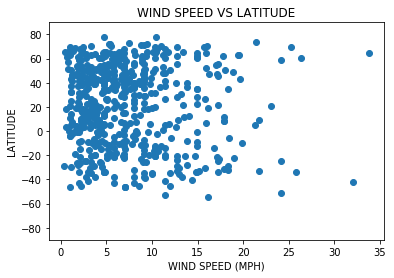

In [58]:
plt.scatter(wind_speed,lat)
plt.ylim(-90,90)
plt.ylabel('LATITUDE')
plt.xlabel('WIND SPEED (MPH)')
plt.title('WIND SPEED VS LATITUDE')
corr=sts.pearsonr(wind_speed,lat);
corr